## Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

### Loading the dataset

In [48]:
#reading the Dataset
raw_data = pd.read_csv("C:\\Users\\HP\\Desktop\\Machine learning\\Projects\\Digit recognizer\\digit_recognizer_train.csv")
test_data = pd.read_csv("C:\\Users\\HP\\Desktop\\Machine learning\\Projects\\Digit recognizer\\digit_recognizer_test.csv")
raw_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Descriptive statistics
raw_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
# checking the NULL values
raw_data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
#Droping the Null values if any

data_with_no_mv = raw_data.dropna(axis=0,how = 'any')

In [7]:
data_with_no_mv.info

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       

### Exploring the data

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

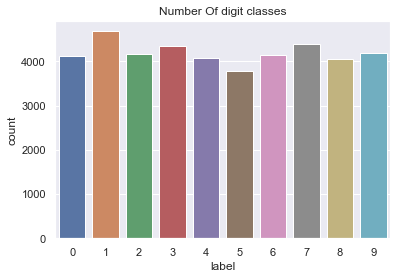

In [8]:
sns.countplot(data_with_no_mv['label'])
plt.title("Number Of digit classes")
data_with_no_mv.label.astype("category").value_counts()

(784,)


Text(0.5, 1.0, 'Digit 4')

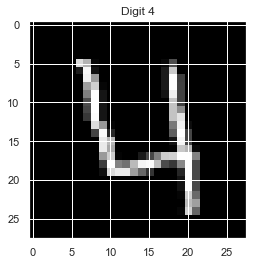

In [9]:
#Observing some of sample and plotting them into matrix
four = data_with_no_mv.iloc[3, 1:]
print(four.shape)
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

(784,)


Text(0.5, 1.0, 'Digit 3')

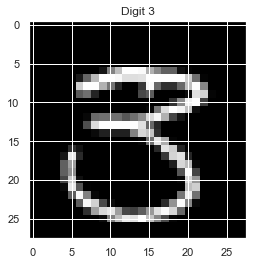

In [10]:
three = data_with_no_mv.iloc[7, 1:]
print(three.shape)
three = three.values.reshape(28,28)
plt.imshow(three, cmap='gray')
plt.title("Digit 3")

In [11]:
# Declaring the dependent(y) and independent(x) variable
x = np.array(data_with_no_mv.drop(['label'],axis = 1))
y = np.array(data_with_no_mv['label'])
y = y.reshape(-1,1)
y.shape

(42000, 1)

In [49]:
#normalizing the data
#In your image classification, dividing by 255 is good because the whole range is in [0,1]. 
#You can't have anything less than 0 and greater than 1.
x_norm = x/255.0
test_data = test_data/255.0

In [50]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_norm)
x_scaled
test_data_scaled = scaler.fit_transform(test_data)

In [14]:
#splitting the data for training and testing
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.3,train_size=0.2,random_state = 42)

## Classifiaction

#### Applying the svc classification:Linear kernel

In [15]:
svc_linear = SVC(kernel = 'linear')
svc_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [16]:
y_pred = svc_linear.predict(x_test)
y_pred

array([8, 1, 9, ..., 5, 6, 0], dtype=int64)

In [17]:
# Checking the accuracy of linear svc kernel
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test,y_pred)}")
print(f"Classification report: {classification_report(y_test,y_pred)}")

Accuracy Score: 0.9076190476190477
Confusion Matrix: [[1161    0    8    1    5   15    7    0    3    0]
 [   0 1363    8    5    1    1    2    1    7    1]
 [  20   13 1174   28   16    4   15    8   11    5]
 [   7   13   28 1187    4   58    1   11   36   10]
 [   2    3   13    2 1156    4    7    2    3   30]
 [  22    6   11   62   15  928   18    1   16    6]
 [  19    4   20    0    8   20 1180    0    5    0]
 [   4   14   28   16   30    1    0 1220    3   43]
 [   9   17   29   58    9   52    5    6 1011   13]
 [  11    2   12   18   59    8    0   58    7 1056]]
Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1200
           1       0.95      0.98      0.97      1389
           2       0.88      0.91      0.89      1294
           3       0.86      0.88      0.87      1355
           4       0.89      0.95      0.92      1222
           5       0.85      0.86      0.85      1085
           6  

#### Applying the svc classification:Non-Linear

In [18]:
svc_rbf = SVC(kernel = 'rbf')
svc_rbf.fit(x_train,y_train)

SVC()

In [19]:
y_pred_rbf = svc_linear.predict(x_test)
y_pred_rbf

array([8, 1, 9, ..., 5, 6, 0], dtype=int64)

In [20]:
# Checking the accuracy of non linear svc kernel
print(f"Accuracy Score: {accuracy_score(y_test,y_pred_rbf)}")
print(f"\nConfusion Matrix: \n{confusion_matrix(y_test,y_pred_rbf)}")
print(f"\nClassification report:\n {classification_report(y_test,y_pred_rbf)}")

Accuracy Score: 0.9076190476190477

Confusion Matrix: 
[[1161    0    8    1    5   15    7    0    3    0]
 [   0 1363    8    5    1    1    2    1    7    1]
 [  20   13 1174   28   16    4   15    8   11    5]
 [   7   13   28 1187    4   58    1   11   36   10]
 [   2    3   13    2 1156    4    7    2    3   30]
 [  22    6   11   62   15  928   18    1   16    6]
 [  19    4   20    0    8   20 1180    0    5    0]
 [   4   14   28   16   30    1    0 1220    3   43]
 [   9   17   29   58    9   52    5    6 1011   13]
 [  11    2   12   18   59    8    0   58    7 1056]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1200
           1       0.95      0.98      0.97      1389
           2       0.88      0.91      0.89      1294
           3       0.86      0.88      0.87      1355
           4       0.89      0.95      0.92      1222
           5       0.85      0.86      0.85      1085
          

### Tuning the model using Gridsearch and KFold

In [21]:
folds = KFold(n_splits=5,shuffle=True,random_state=8)
parameters = {'gamma':[1e-2,1e-3,1e-4],'C':[1.0,100]}
model = GridSearchCV(estimator=svc_rbf,param_grid=parameters,scoring='accuracy',verbose=1)
model.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 100], 'gamma': [0.01, 0.001, 0.0001]},
             scoring='accuracy', verbose=1)

In [22]:
results = pd.DataFrame(model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,61.400281,4.649726,12.156362,1.025063,1.0,0.01,"{'C': 1.0, 'gamma': 0.01}",0.754167,0.749405,0.756548,0.760714,0.760714,0.756310,0.004269,6
1,14.071709,0.219761,6.832734,0.200974,1.0,0.001,"{'C': 1.0, 'gamma': 0.001}",0.926786,0.933929,0.934524,0.926786,0.920833,0.928571,0.005107,2
2,20.598771,0.573673,8.798482,0.357006,1.0,0.0001,"{'C': 1.0, 'gamma': 0.0001}",0.901786,0.901786,0.900595,0.898214,0.893452,0.899167,0.003141,4
3,57.608406,1.879560,10.745495,0.261093,100,0.01,"{'C': 100, 'gamma': 0.01}",0.768452,0.763690,0.771429,0.780952,0.771429,0.771190,0.005642,5
4,11.167701,0.130655,5.451029,0.045019,100,0.001,"{'C': 100, 'gamma': 0.001}",0.938095,0.939881,0.940476,0.936905,0.933929,0.937857,0.002339,1
5,6.813801,0.125223,4.199162,0.025695,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.920833,0.927381,0.920833,0.922024,0.914286,0.921071,0.004168,3


In [23]:
#checking the best parameters
model.best_params_

{'C': 100, 'gamma': 0.001}

In [24]:
#training model on best parameters--->observe from above results
svm_final = SVC(kernel = 'rbf',gamma=0.001,C=10)
svm_final.fit(x_train,y_train)

SVC(C=10, gamma=0.001)

In [25]:
svm_final_pred = svm_final.predict(x_test)

In [26]:
#predicting the final accuracy
print(f"Accuracy Score: {accuracy_score(y_test,svm_final_pred)}")
print(f"\nConfusion Matrix: \n{confusion_matrix(y_test,svm_final_pred)}")
print(f"\nClassification report:\n {classification_report(y_test,svm_final_pred)}")

Accuracy Score: 0.9449206349206349

Confusion Matrix: 
[[1179    0    7    1    3    2    5    0    3    0]
 [   1 1363   12    2    1    2    3    0    4    1]
 [   7    4 1237   11    9    1    7    6    9    3]
 [   2    5   32 1252    0   22    1   11   22    8]
 [   1    2   18    1 1166    2    9    2    1   20]
 [   8    3   15   31    7  996   12    3    5    5]
 [  11    2   18    0    6   11 1204    0    4    0]
 [   3   15   25   10   22    2    0 1256    0   26]
 [   4    6   11   19    8   24    4    3 1124    6]
 [   5    1   17    9   29    5    0   32    4 1129]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1200
           1       0.97      0.98      0.98      1389
           2       0.89      0.96      0.92      1294
           3       0.94      0.92      0.93      1355
           4       0.93      0.95      0.94      1222
           5       0.93      0.92      0.93      1085
          

In [53]:
#checking the model on completely new data
pred_on_test_data = svc_rbf.predict(test_data_scaled)

In [54]:
print ('Image Id  label')
for i in range(len(pred_on_test_data)):
    print(f'{i+1}\t\t{pred_on_test_data[i]}')

5
25779		1
25780		4
25781		0
25782		3
25783		8
25784		8
25785		7
25786		1
25787		1
25788		6
25789		8
25790		2
25791		8
25792		6
25793		3
25794		4
25795		5
25796		9
25797		4
25798		2
25799		3
25800		1
25801		2
25802		0
25803		8
25804		3
25805		5
25806		8
25807		5
25808		2
25809		2
25810		3
25811		0
25812		1
25813		1
25814		4
25815		8
25816		2
25817		7
25818		6
25819		0
25820		6
25821		5
25822		8
25823		4
25824		3
25825		3
25826		3
25827		2
25828		9
25829		5
25830		5
25831		4
25832		7
25833		2
25834		5
25835		9
25836		5
25837		4
25838		7
25839		8
25840		4
25841		3
25842		2
25843		3
25844		6
25845		9
25846		2
25847		6
25848		3
25849		4
25850		4
25851		6
25852		1
25853		9
25854		2
25855		5
25856		2
25857		2
25858		9
25859		0
25860		8
25861		7
25862		8
25863		0
25864		8
25865		6
25866		2
25867		5
25868		5
25869		2
25870		5
25871		4
25872		2
25873		6
25874		0
25875		9
25876		8
25877		5
25878		9
25879		6
25880		1
25881		9
25882		3
25883		7
25884		1
25885		3
25886		7
25887		4
25888		1
25889		1

In [59]:
pred_on_test_data = pd.DataFrame(pred_on_test_data)
sub_df = pd.read_csv("C:\\Users\\HP\\Downloads\\digit_sample_submission.csv")
datasets = pd.concat([sub_df["ImageId"],pred_on_test_data],axis = 1)
datasets.columns = ["ImageId",'Label']
datasets.to_csv('sample_submission.csv',index = False)